<a href="https://colab.research.google.com/github/luanamouraa/Projeto-A2/blob/main/Raspagem_coment%C3%A1rios_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Review do Iphone 11 da apple no site da Amazon
# Avaliar o comentário pelo sentimento

!pip install requests
!pip install beautifulsoup4
!pip install webdriver
!pip install selenium

import requests
from bs4 import BeautifulSoup
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement webdriver (from versions: none)
ERROR: No matching distribution found for webdriver
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
url = 'https://www.amazon.com.br/Apple-MHDH3BR-A-iPhone-11-128-GB/product-reviews/B08N5G4CM2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
def extract_reviews(soup):
    reviews = []
    review_elements = soup.find_all('div', {'data-hook': 'review'})
    for review_element in review_elements:
        title = review_element.find('a', {'data-hook': 'review-title'}).get_text().strip()
        text = review_element.find('span', {'data-hook': 'review-body'}).get_text().strip()
        reviews.append({'title': title, 'text': text})

    return reviews

In [ ]:
reviews = extract_reviews(soup)

In [ ]:
reviews

[{'title': 'Aparelho esteticamente maravilhoso é absurdamente rápido e fluido.',
  'text': 'Pontos fortes:1: o telefone realmente impressiona na velocidade, especialmente se você estiver vindo de um Android mais antigo, não top de linha. Ele não trava nem engasga de forma alguma, mesmo com dezenas de apps abertos em segundo plano.2: esteticamente impecável.3: ótimo valor de revenda, você consegue vender no futuro por um valor próximo do que pagou se o aparelho estiver bem conservado, sem riscos e com a saúde da bateria ok. O que é impossível no Android.Pontos negativos:1: a bateria as vezes é consumida surpreendentemente rápido, comigo pelo menos em casos de uso como ligações usando viva voz ou assistindo vídeos e streams, a bateria gasta uma porcentagem que dá até uma assustada. Não uso o celular para jogar qualquer coisa, mas suponho que a bateria esgota em tempo recorde com games.2: o celular vir sem carregador e não ter entrada para fones de ouvido com fio pode forçar o usuário a g

In [ ]:
import pandas as pd

df = pd.DataFrame(reviews)

df.to_excel('Reviews_iphone11.xlsx', index = False)

In [ ]:
!pip install transformers sentence-transformers torch

In [ ]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
def sentimento(texto):
    valor = sentiment_task(texto)
    return valor[0]['label']

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
df['sentiment'] = df['text'].apply(sentimento)

In [ ]:
df.to_excel('Reviews_iphone11.xlsx')

In [ ]:
# nuvem de palavras com os comentários

In [ ]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Reviews_iphone11.xlsx')
texto = ''
for linha in df['text']:
    print(linha)
    texto += linha + ' '

In [ ]:
print(df[['text']])

In [17]:
from wordcloud import WordCloud

In [47]:
wordcloud = WordCloud()
wordcloud.generate_from_text(texto)

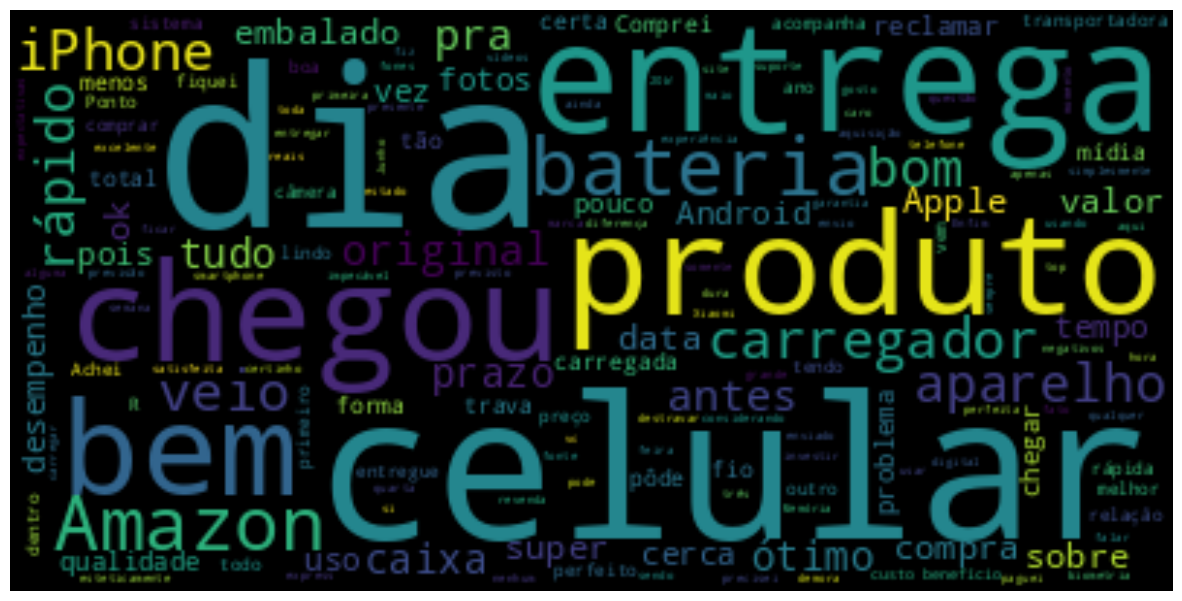

In [53]:
stopwords = []
arqstop = open('stopwords.txt')

for linha in arqstop:
    stopwords.append(linha.replace('\n', '').replace(' ' , ''))
    stopwords += ['linha', 'in', 'and', 'the', 'n', 'pp', 'of', 'op']

linha = "exemplo"
lista = linha.split(' ')
nova_lista = []
nova_linha = ''

for palavra in lista:
     if len(palavra) > 3:
        nova_lista.append(palavra)
        nova_linha = ' '
        nova_linha += palavra + ' '
wordcloud = WordCloud(stopwords=stopwords)

wordcloud.generate_from_text(texto)
plt.figure(figsize = (15, 10))
plt.imshow( wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()